In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_excel('FN_Training_Set.xlsx')
# title = data.dropna(subset=['Content Title'])

TITLE_LIMIT = 70
title_freqs = data['Content Title'].str[:TITLE_LIMIT].value_counts()
title_freqs

Chemtrails HAARP (химически следи в небето и ХААРП)                       45
Февруари топлота и обич                                                   14
Голямата химическа лъжа в Сирия                                           13
Стряскащо предсказание за края на света на руската Ванга разтърси мреж    12
Каквото правите тази събота, това ще правите през цялата година! В джо    12
Сливането на човешките раси - Алхимията на Сатанизма                      11
7 предупреждения от Ванга и народните поверия, които пренебрегваме и з     9
Забравеният завет на Ванга, който цери и най-страшните заболявания         9
Не приемайте като подарък тези 7 предмета! Могат да ви донесат лош къс     8
Онлайн вестник Струма - Любопитно                                          8
Баба Ванга с неочаквано предсказание за Тръмп                              8
Тръмп призова двама известни сенатори да не подклаждат Трета световна      8
Няма как да не сте чували за мистерията около Царичина, но ето какво р     7

In [2]:
data.columns

Index(['fake_news_score', 'click_bait_score', 'Content Title', 'Content Url',
       'Content Published Time', 'Content'],
      dtype='object')

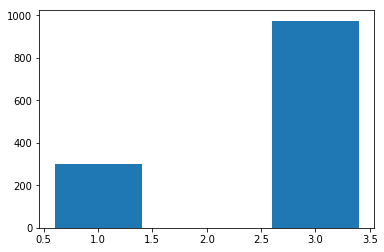

In [3]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

def show_repeating(column):

    histogram_bars = defaultdict(lambda: 0)

    for index, row in data.iterrows():
        if title_freqs[row['Content Title'][:TITLE_LIMIT]] > 1:
            histogram_bars[row[column]] += 1
    return histogram_bars

histogram_dict = show_repeating('fake_news_score')
plt.bar(height = list(histogram_dict.values()), left=[1,3])
plt.show()

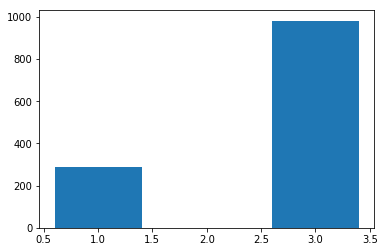

In [4]:
histogram_dict = show_repeating('click_bait_score')
plt.bar(height = list(histogram_dict.values()), left=[1,3])
plt.show()

In [5]:
one_three = 0
three_one = 0

for index, row in data.iterrows():
    if row['fake_news_score'] == 1 and row['click_bait_score'] == 3:
        one_three += 1
    elif row['fake_news_score'] == 3 and row['click_bait_score'] == 1:
        three_one += 1

print(one_three, three_one)


28 0


In [6]:
# good split
# visualization
# stylometry
# language difficulty
# pmi
# ner
# pos tags
# knn - with slylometry for ex.

In [52]:
from wordcloud import WordCloud

sw = open('stopwords.txt').read().split('\n') + ['това']

def get_word_cloud(column, value):
    text = ""
    for index, row in data.iterrows():
        if row[column] == value:
            text += " "+ " ".join([word for word in str(row['Content']).lower().split(" ") if word not in sw])
     # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.figure(figsize=(14,8))
    plt.axis("off")
    plt.show()

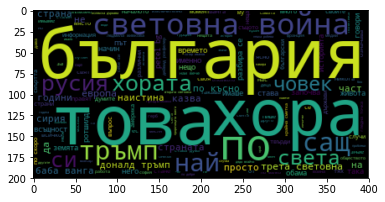

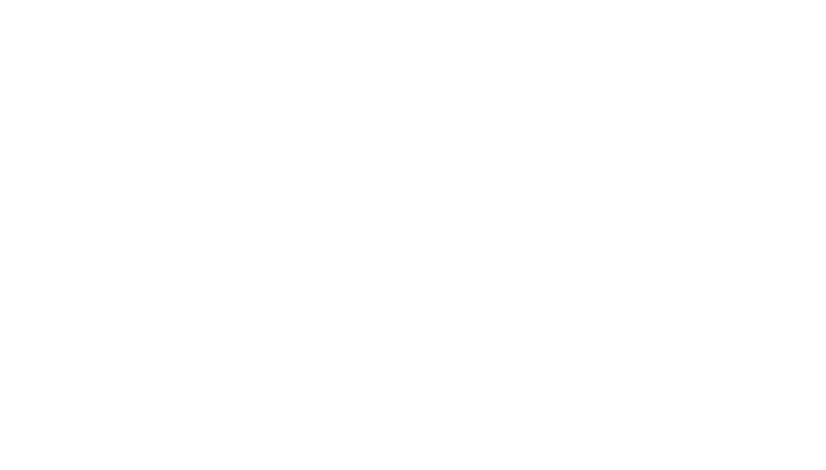

In [53]:
get_word_cloud('fake_news_score',1)

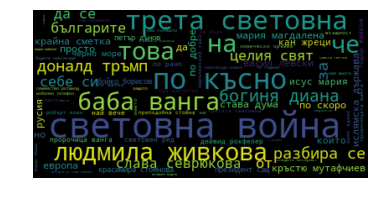

In [35]:
get_word_cloud('fake_news_score',3)

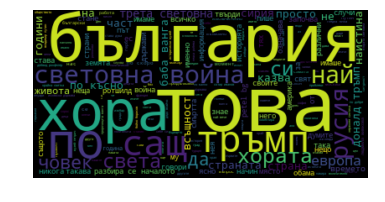

In [40]:
get_word_cloud('click_bait_score',1)

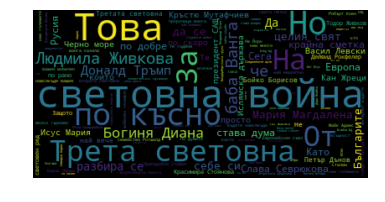

In [32]:
get_word_cloud('click_bait_score',3)